# The libraries are imported and the images are read from the path one by one and stored in a list with grayscale format.

In [1]:
from imutils import paths
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

label_path = "./Desktop/AMLS/label.csv"
df = pd.read_csv(label_path)

path = "./Desktop/AMLS/image"
image_paths = list(paths.list_images(path))

images = []
 
for image_path in image_paths:
    image = cv2.imread(image_path,0)
    images.append(image)


# This is for viewing purposes to see the image, the cm.gray option is added due to the colormapping style of matplotlib.

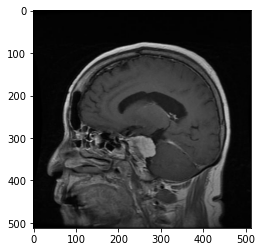

In [2]:
def plot_img(image):
    plt.imshow(image,cmap = plt.cm.gray)
plot_img(images[0])

# Goes through the label dataframe and assigns the value of 0 if no tumor, 1 if there is tumor. Appends their image to the same row. Then reshape the numpy array of X to be flat.

In [10]:
Y = []
X = []


for i in range(0, 3000):
    
    if "no_tumor" in (df.iat[i,1]): 
        Y.append(0)
        X.append(images[i])
    else:
        Y.append(1)
        X.append(images[i])

X=np.array(X)
X = X.reshape(len(X),-1)


X.shape

(3000, 262144)

# Shuffle the X and Y's and split the data into training and test with the ratio of 0.8 to 0.2, and random state of 42 is added.

In [11]:
X, Y = shuffle(X,Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)


# Define the SVM model with the kernel function linear, show the accuracy

In [12]:
def SVM(x_train,y_train, x_test):
    model = SVC(kernel='linear')
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    return y_pred

y_pred=SVM(x_train,y_train, x_test)
print(accuracy_score(y_test,y_pred))


0.9383333333333334


# Below, the testing data are loaded and put into the SVM model as the test set of X. This shows the testing accuracy of provided dataset

In [6]:
test_label_path = "./Desktop/AMLS/test/label.csv"
df_test = pd.read_csv(test_label_path)

test_path = "./Desktop/AMLS/test/image"
test_image_paths = list(paths.list_images(test_path))

test_images = []


for test_image_path in test_image_paths:
    test_image = cv2.imread(test_image_path,0)
    test_images.append(test_image)



In [7]:
test_X =[]
test_Y =[]

for i in range(0, 200):
    
    if "no_tumor" in (df_test.iat[i,1]): 
        test_Y.append(0)
        test_X.append(test_images[i])
    else:
        test_Y.append(1)
        test_X.append(test_images[i])

test_X=np.array(test_X)
test_X = test_X.reshape(len(test_X),-1)





In [13]:
y_pred_test=SVM(x_train,y_train, test_X)
print(accuracy_score(test_Y,y_pred_test))


0.91


# The definitions below are optional, do not need to run them. They display the accuracies with different kernel functions.

In [14]:
def SVM_p2(x_train,y_train, x_test):
    model = SVC(kernel='poly', degree=2)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    return y_pred

y_pred=SVM_p2(x_train,y_train, x_test)
print(accuracy_score(y_test,y_pred))


0.9333333333333333


In [15]:
def SVM_p3(x_train,y_train, x_test):
    model = SVC(kernel='poly', degree=3)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    return y_pred

y_pred=SVM_p3(x_train,y_train, x_test)
print(accuracy_score(y_test,y_pred))


0.935
